In [70]:
import numpy as np
import matplotlib.pyplot as plt
import math

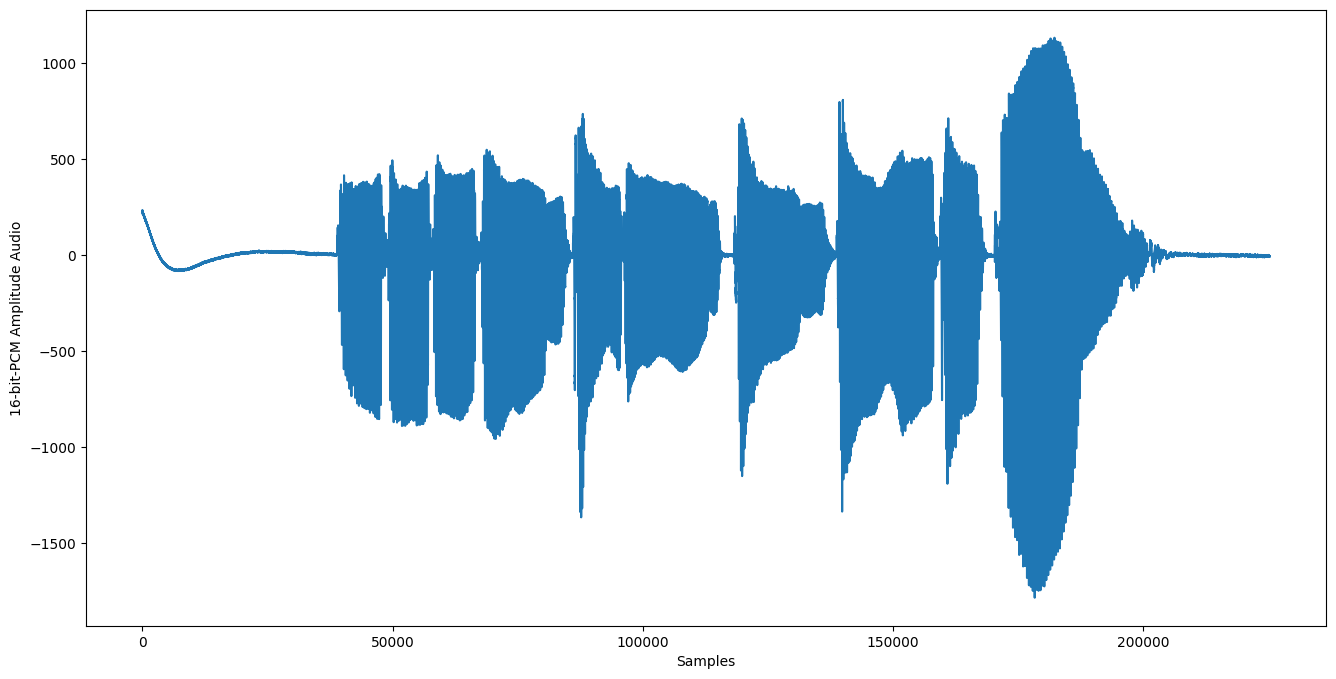

In [71]:
# Nr. 1 a)

path = "Versuch4Daten/aufgabe1a/aufnahme2.npy"

y = np.load(path)

plt.figure(figsize=(16,8))
plt.plot(y)
plt.xlabel("Samples")
plt.ylabel("16-bit-PCM Amplitude Audio")
plt.show()

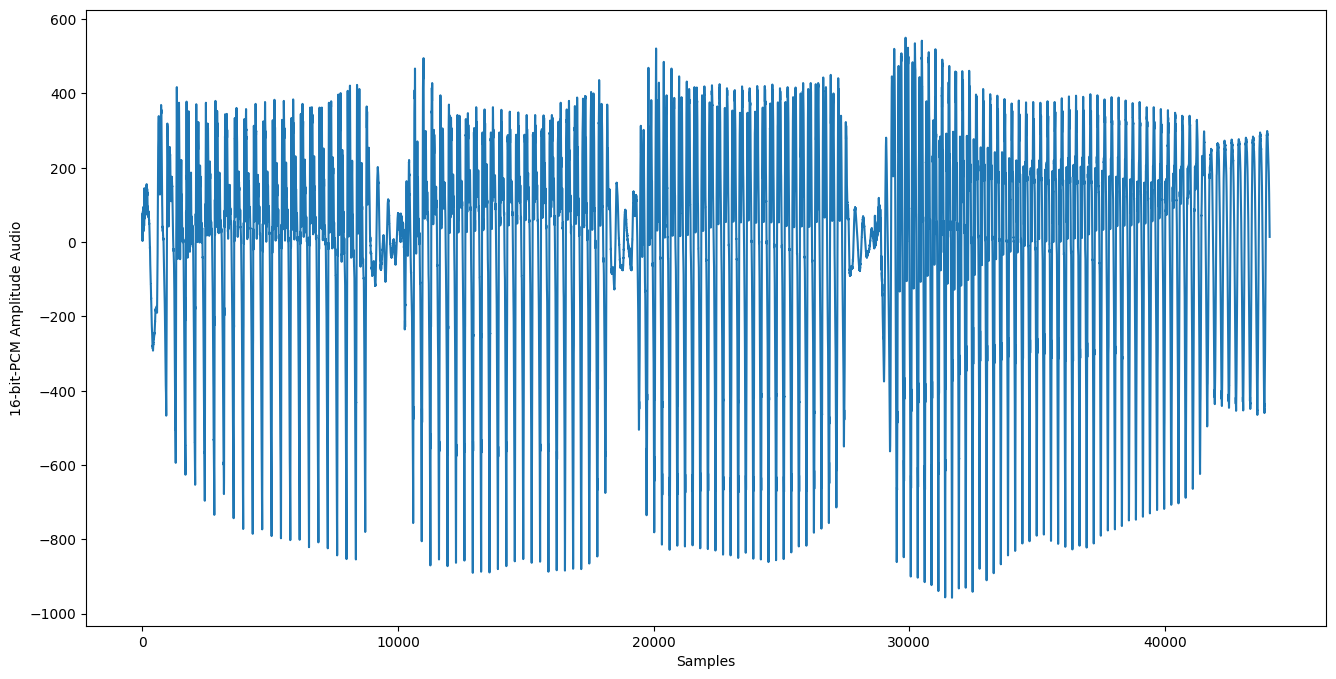

In [72]:
#Nr. 1 b)

y_list = y.tolist()

first20 = 20000
for x in y_list[20000:]:
    if x >= 50 or x <= -50:
        break
    first20 += 1

oneSecond = y_list[first20: first20 + 44100]

plt.figure(figsize=(16,8))
plt.plot(oneSecond)
plt.xlabel("Samples")
plt.ylabel("16-bit-PCM Amplitude Audio")
plt.show()

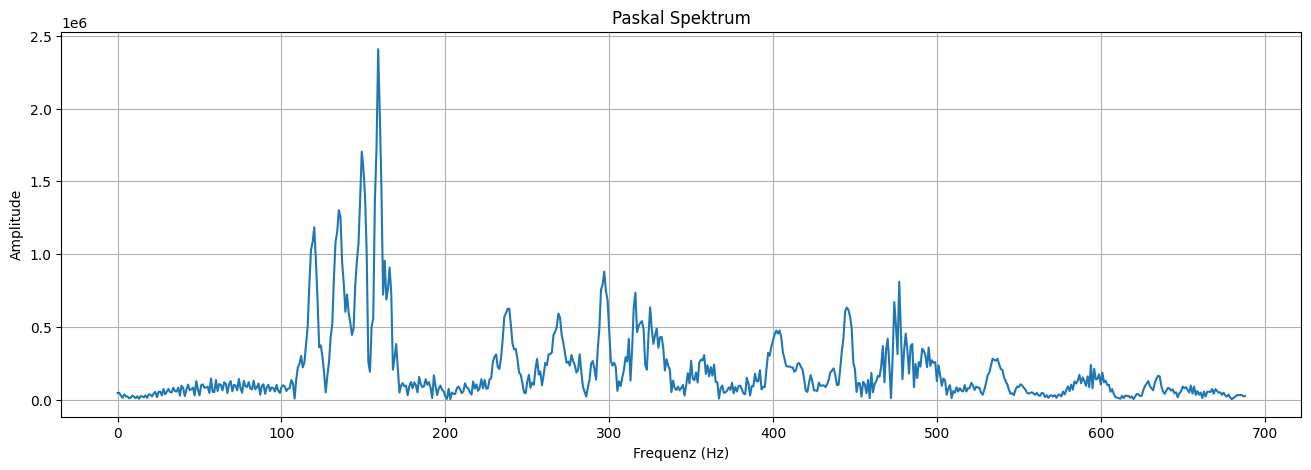

In [73]:
# Nr. 1 c)

def spectrum_plotten(data, limit, titel):

    M = len(data)
    delta_t = 1. / 44100.
    
    fft_result = data
    amplitude_spectrum = np.abs(fft_result)
    
    frequencies = np.array(range(M))
    for n in range(M):
        frequencies[n] = n / (M * delta_t)
        
    positive_freqs = frequencies[:M // limit]
    positive_amplitudes = amplitude_spectrum[:M // limit]
    

    plt.figure(figsize=(16, 5))
    plt.plot(positive_freqs, positive_amplitudes)
    plt.xlabel("Frequenz (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.title(titel)
    plt.show()



spectrum_plotten(np.fft.fft(oneSecond), 64, "Paskal Spektrum")

In [74]:
# Nr. 1 d)

def windowing(data):

    fs = 44100
    window_size = 512
    overlap = window_size // 2
    std_dev = window_size / 4
    
    def gaussian_window(length, std_dev):
        n = np.arange(length)
        center = (length - 1) / 2
        window = np.exp(-0.5 * ((n - center) / std_dev) ** 2)
        return window
    
    abschnitte = [
        data[i:i + window_size]
        for i in range(0, len(data) - window_size + 1, overlap)
    ]
    
    gaus = gaussian_window(window_size, std_dev)
    
    gaus_fenster = [abschnitt * gaus for abschnitt in abschnitte]

    fft_fenster = np.array([np.fft.fft(x) for x in gaus_fenster])
    return np.mean(fft_fenster, axis=0)


In [75]:
"""
plt.plot(gaus)
plt.show()

plt.plot(abschnitte[0])
plt.plot(gaus_fenster[0])
plt.show()

for x in abschnitte:
    plt.plot(x)
plt.show()
for x in gaus_fenster:
    plt.plot(x)
plt.show()
"""

'\nplt.plot(gaus)\nplt.show()\n\nplt.plot(abschnitte[0])\nplt.plot(gaus_fenster[0])\nplt.show()\n\nfor x in abschnitte:\n    plt.plot(x)\nplt.show()\nfor x in gaus_fenster:\n    plt.plot(x)\nplt.show()\n'

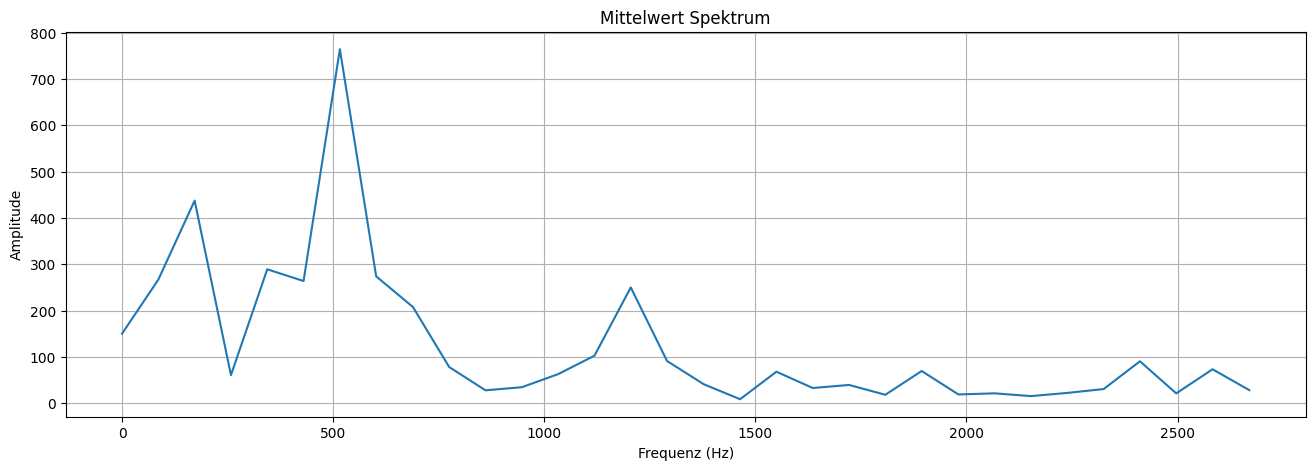

In [76]:
spectrum_plotten(windowing(oneSecond), 16, "Mittelwert Spektrum")

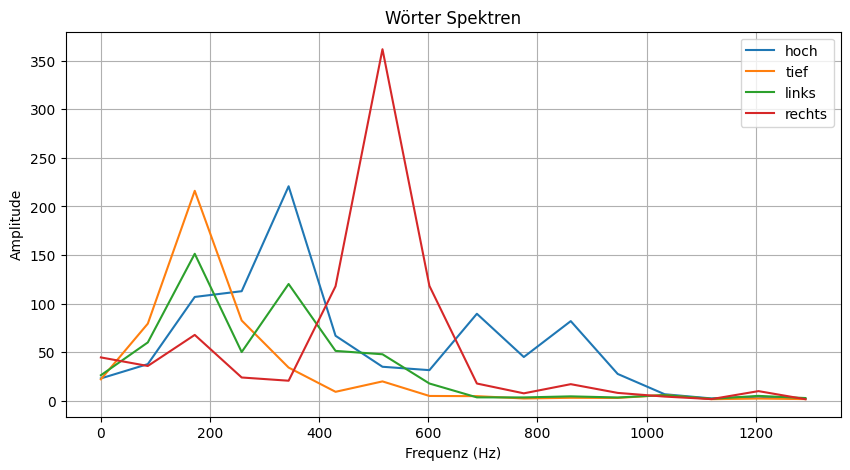

In [77]:
# Nr. 2 a)

def spektren_plotten(data, limit, titel, labels):
    plt.figure(figsize=(10, 5))
    for i in range(len(data)):
        fft_values = data[i]
        M = len(fft_values)
        delta_t = 1. / 44100.
        
        amplitude_spectrum = np.abs(fft_values)
        
        frequencies = np.array(range(M))
        for n in range(M):
            frequencies[n] = n / (M * delta_t)
            
        positive_freqs = frequencies[:M // limit]
        positive_amplitudes = amplitude_spectrum[:M // limit]

        
        plt.plot(positive_freqs, positive_amplitudes, label=labels[i])
        
    plt.xlabel("Frequenz (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.title(titel)
    plt.show()


worter = ["hoch", "tief", "links", "rechts"]

spektren_worter = []

for wort in worter:

    data = []
    for i in range(1, 6):
        path = f"Versuch4Daten/{wort}/{wort}{i}.npy"
        y = np.load(path)
        data.append(y)
    
    freq_spectren = np.array(list(map(lambda x: windowing(x), data)))
    
    mittel = np.mean(freq_spectren, axis=0)

    spektren_worter.append((wort, mittel))


spektren_plotten(list(map(lambda x : x[1], spektren_worter)),32,  "Wörter Spektren", worter)

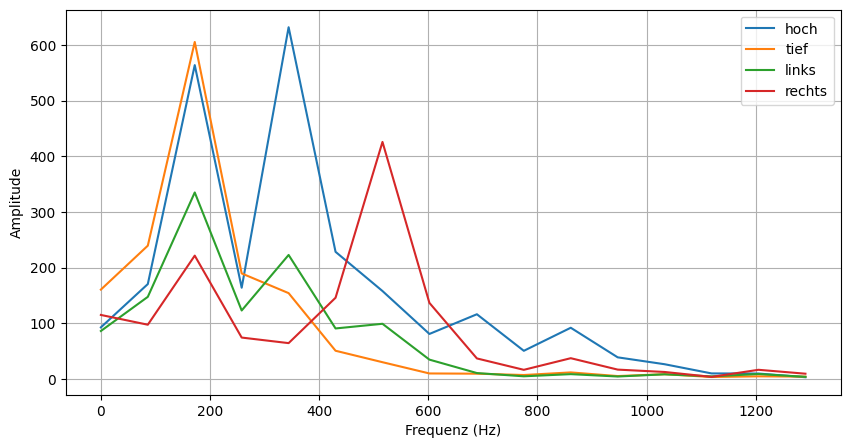

In [114]:
def spektren_plotten(data, limit, titel, labels):
    plt.figure(figsize=(10, 5))
    for i in range(len(data)):
        M = len(data[0])
        delta_t = 1. / 44100.
        
        frequencies = np.array(range(M))
        for n in range(M):
            frequencies[n] = n / (512 * delta_t)
        
        plt.plot(frequencies, data[i], label=labels[i])
        
    plt.xlabel("Frequenz (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.title(titel)
    plt.show()

worter = ["hoch", "tief", "links", "rechts"]

spektren_worter = []

for wort in worter:

    data = []
    for i in range(1, 6):
        path = f"Versuch4Daten/{wort}/{wort}{i}.npy"
        y = np.load(path)
        data.append(y)

    fft_spektren = [np.abs(windowing(x)) for x in data]

    temp = []

    for x in fft_spektren:
        temp.append(x[: len(x) // 32])
    fft_spektren = temp.copy()

    mittel = np.mean(fft_spektren, axis=0)

    spektren_worter.append(mittel)

spektren_plotten(spektren_worter, 32, "", worter)



In [115]:
# Nr. 2 c) 

def Korrelationskoeffizienten_nach_Bravais_Pearson(f, g):
    assert(len(f) == len(g))
    n = len(f)
   
    mu_f = sum(f) / n
    mu_g = sum(g) / n

    ziped = [(f[i], g[i]) for i in range(n)]
    
    # Kovarianz
    o_fg = (1. / n) * sum(list(map(lambda el_fg : (el_fg[0] - mu_f) * (el_fg[1] - mu_g), ziped)))

    # Standardabweichungen
    o_f = math.sqrt((1. / (n - 1)) * sum([(el_f - mu_f)**2 for el_f in f]))
    o_g = math.sqrt((1. / (n - 1)) * sum([(el_g - mu_g)**2 for el_g in g]))

    if o_f == 0 or o_g == 0:
        return float('nan')

    # Korrelationskoeffizienten
    r_fg = o_fg / (o_f * o_g)

    return r_fg


print(Korrelationskoeffizienten_nach_Bravais_Pearson(spektren_worter[0], spektren_worter[0]))
print(Korrelationskoeffizienten_nach_Bravais_Pearson(spektren_worter[1], spektren_worter[3]))

print(np.shape(spektren_worter))

0.9375000000000001
0.3233291803083595
(4, 16)


In [117]:
# Nr. 2 d)

def Worterkenner(referenz_spektren, spektrum):
    korelationen = [(worter[i], x, Korrelationskoeffizienten_nach_Bravais_Pearson(x, spektrum)) for i, x in enumerate(referenz_spektren)]
    #print([(x[0], x[2]) for x in korelationen])
    max_val = max(korelationen, key=lambda x : x[2])
    return max_val
    

worter = ["hoch", "tief", "links", "rechts"]

sprecher = ["Janis", "Philippe"]
for spr in sprecher:
    print("Sprecher: " + spr)
    correct = 0
    for wort in worter:
        for i in range(1, 6):
            path = f"Versuch4Daten/testDaten{spr}/{wort}/{wort}{i}.npy"
            freq_spectrum = np.abs(windowing(np.load(path))[: len(x) // 32])
            
            res = Worterkenner(spektren_worter, freq_spectrum)
    
            #spectrum_plotten(list(freq_spectrum), 32, f"{wort} test Spektrum")
            #spectrum_plotten(list(res[1]), 32, f"{res[0]} erkannt Spektrum")
            print(wort + " erkannt als: " + res[0])
            if wort == res[0]:
                correct += 1
    print(str((correct / 20.) * 100) + "% Wörter wurden korrekt erkannt")
    print()
    


Sprecher: Janis
hoch erkannt als: tief
hoch erkannt als: tief
hoch erkannt als: tief
hoch erkannt als: tief
hoch erkannt als: links
tief erkannt als: tief
tief erkannt als: links
tief erkannt als: links
tief erkannt als: tief
tief erkannt als: tief
links erkannt als: hoch
links erkannt als: tief
links erkannt als: hoch
links erkannt als: hoch
links erkannt als: tief
rechts erkannt als: rechts
rechts erkannt als: tief
rechts erkannt als: tief
rechts erkannt als: tief
rechts erkannt als: rechts
25.0% Wörter wurden korrekt erkannt

Sprecher: Philippe
hoch erkannt als: hoch
hoch erkannt als: hoch
hoch erkannt als: links
hoch erkannt als: tief
hoch erkannt als: hoch
tief erkannt als: hoch
tief erkannt als: hoch
tief erkannt als: links
tief erkannt als: tief
tief erkannt als: links
links erkannt als: hoch
links erkannt als: rechts
links erkannt als: links
links erkannt als: hoch
links erkannt als: links
rechts erkannt als: rechts
rechts erkannt als: rechts
rechts erkannt als: hoch
rechts erk